In [ ]:
#Create Pixabay account an get Api key, https://youtu.be/_G2VK_wbHlM?si=jCnDaQW5MdHDKN1H
PIXABAY_API_KEY = "50804779-0aed8052eeea7c90211c6f643"

In [ ]:
!pip install duckduckgo-search==1.1.0 tqdm

import tensorflow as tf
print("✅ TensorFlow version:", tf.__version__)
print("✅ GPUs Available:", len(tf.config.list_physical_devices('GPU')))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.9 MB/s eta 0:00:00
✅ TensorFlow version: 2.18.0
✅ GPUs Available: 1


In [ ]:
import os

base_path = '/content/monkey_project'
folders = [
    "monkey_dataset/proboscis_monkey",
    "monkey_dataset/spider_monkey",
    "monkey_dataset/japanese_macaque",
    "monkey_dataset/train",
    "monkey_dataset/val",
    "monkey_dataset/test",
    "models",
    "plots"
]

for folder in folders:
    path = os.path.join(base_path, folder)
    os.makedirs(path, exist_ok=True)

dataset_root = os.path.join(base_path, 'monkey_dataset')
classes = ['proboscis_monkey', 'spider_monkey', 'japanese_macaque']
splits = ['train', 'val', 'test']



In [ ]:
!pip install --upgrade duckduckgo-search



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.8 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import DDGS
import os, requests
from tqdm import tqdm


In [ ]:
def download_ddg_images(query, folder, max_images=500):
    os.makedirs(folder, exist_ok=True)

    with DDGS() as ddgs:
        results = ddgs.images(keywords=query, max_results=max_images)
        for i, img in enumerate(tqdm(results, desc=f" {query}")):
            try:
                response = requests.get(img["image"], timeout=5)
                if response.status_code == 200:
                    filename = f"{query.replace(' ', '_')}_{i+1}.jpg"
                    with open(os.path.join(folder, filename), "wb") as f:
                        f.write(response.content)
            except Exception:
                continue


In [ ]:
import os

base_path = '/content/monkey_project'
dataset_root = os.path.join(base_path, 'monkey_dataset')

classes = ['proboscis_monkey', 'spider_monkey', 'japanese_macaque']


In [ ]:
queries = {
    "proboscis_monkey": ["Proboscis Monkey", "Nasalis larvatus", "Long-nosed monkey", "Proboscis Monkey in forest", "Proboscis Monkey close up", "Proboscis Monkey baby"],
    "spider_monkey": ["Spider Monkey", "Ateles geoffroyi", "Black-handed spider monkey", "Spider Monkey in jungle", "Spider Monkey close up", "Spider Monkey baby"],
    "japanese_macaque": ["Japanese Macaque", "Snow Monkey", "Macaca fuscata", "Japanese Macaque in snow", "Macaque hot spring", "Baby Japanese Macaque"]
}

for folder, terms in queries.items():
    target = os.path.join(dataset_root, folder)
    for term in terms:
        download_ddg_images(term, target, max_images=500)



 Spider Monkey close up: 100%|██████████| 230/230 [02:02<00:00,  1.87it/s]


RatelimitException: https://duckduckgo.com/i.js?l=wt-wt&o=json&q=Spider+Monkey+baby&vqd=4-224576816288618397584400957969437496269&f=%2C%2C%2C%2C%2C&p=1 403 Ratelimit

In [ ]:
!sudo apt-get install libavif-dev -y
!pip install -U pillow-avif-plugin


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libabsl20210324 libavif13 libgav1-0 libyuv0
The following NEW packages will be installed:
  libabsl20210324 libavif-dev libavif13 libgav1-0 libyuv0
0 upgraded, 5 newly installed, 0 to remove and 35 not upgraded.
Need to get 966 kB of archives.
After this operation, 3,537 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libabsl20210324 amd64 0~20210324.2-2ubuntu0.2 [386 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgav1-0 amd64 0.17.0-1build1 [336 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libyuv0 amd64 0.0~git20220104.b91df1a-2 [154 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libavif13 amd64 0.9.3-3 [69.5 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libavif-dev amd64 0.9.3-3 [21.0 kB]
Fetched 966 kB i

In [ ]:
import pillow_avif


In [ ]:
import glob, shutil, random

def is_image_file(f):
    return f.lower().endswith(('.jpg', '.jpeg', '.png'))

def split_dataset(base_dir, classes):
    for cls in classes:
        source = os.path.join(base_dir, cls)
        files = [f for f in glob.glob(os.path.join(source, '*')) if is_image_file(f)]
        random.shuffle(files)
        total = len(files)
        train_end = int(0.7 * total)
        val_end = int(0.85 * total)

        split_map = {
            'train': files[:train_end],
            'val': files[train_end:val_end],
            'test': files[val_end:]
        }

        for split, file_list in split_map.items():
            target_dir = os.path.join(base_dir, split, cls)
            os.makedirs(target_dir, exist_ok=True)
            for file_path in file_list:
                shutil.copy(file_path, target_dir)

split_dataset(dataset_root, classes)


In [ ]:
import os
import requests
from tqdm import tqdm

def download_pixabay_images(query, folder, api_key, max_images=100):
    os.makedirs(folder, exist_ok=True)
    base_url = "https://pixabay.com/api/"
    params = {
        "key": api_key,
        "q": query,
        "image_type": "photo",
        "per_page": 200,  # max per request
        "safesearch": "true"
    }

    downloaded = 0
    page = 1

    while downloaded < max_images:
        params["page"] = page
        response = requests.get(base_url, params=params)
        data = response.json()

        hits = data.get("hits", [])
        if not hits:
            print("No more results.")
            break

        for hit in hits:
            if downloaded >= max_images:
                break
            img_url = hit["largeImageURL"]
            try:
                img_data = requests.get(img_url, timeout=5).content
                filename = os.path.join(folder, f"{query.replace(' ', '_')}_{downloaded+1}.jpg")
                with open(filename, "wb") as f:
                    f.write(img_data)
                downloaded += 1
            except Exception as e:
                print(f" Error downloading image: {e}")

        page += 1

    print(f" Downloaded {downloaded} images for '{query}'")



In [ ]:
!pip install icrawler


In [ ]:
for split in ['train', 'val', 'test']:
    for cls in classes:
        path = os.path.join(dataset_root, split, cls)
        print(f"{split}/{cls}: {len(os.listdir(path))} images")


In [ ]:
import os
import requests
from tqdm import tqdm

def download_pixabay_images(query, folder, api_key, max_images=100):
    os.makedirs(folder, exist_ok=True)
    base_url = "https://pixabay.com/api/"
    params = {
        "key": api_key,
        "q": query,
        "image_type": "photo",
        "per_page": 200,  # max allowed per page
        "safesearch": "true"
    }

    downloaded = 0
    page = 1

    while downloaded < max_images:
        params["page"] = page
        response = requests.get(base_url, params=params)

        # Handle API errors
        if response.status_code != 200:
            print(f" Request failed: {response.status_code}")
            print("Response content:", response.text[:200])
            break

        try:
            data = response.json()
        except Exception as e:
            print(" JSON decode failed:", e)
            print("Raw response:", response.text[:300])
            break

        hits = data.get("hits", [])
        if not hits:
            print(" No more results found.")
            break

        for hit in hits:
            if downloaded >= max_images:
                break
            img_url = hit.get("largeImageURL")
            if not img_url:
                continue
            try:
                img_data = requests.get(img_url, timeout=5).content
                filename = os.path.join(folder, f"{query.replace(' ', '_')}_{downloaded+1}.jpg")
                with open(filename, "wb") as f:
                    f.write(img_data)
                downloaded += 1
            except Exception as e:
                print(f" Error downloading image: {e}")
                continue

        page += 1

    print(f" Downloaded {downloaded} images for '{query}' into '{folder}'")



In [ ]:
PIXABAY_API_KEY = "your_actual_pixabay_api_key"

target_folder = os.path.join(dataset_root, "japanese_macaque")
download_pixabay_images("Japanese Macaque", target_folder, PIXABAY_API_KEY, max_images=500)


 Request failed: 400
Response content: [ERROR 400] Invalid or missing API key (https://pixabay.com/api/docs/).
 Downloaded 0 images for 'Japanese Macaque' into '/content/monkey_project/monkey_dataset/japanese_macaque'


In [ ]:
from PIL import Image

def clean_broken_images(base_dir, class_list):
    for cls in class_list:
        folder = os.path.join(base_dir, cls)
        files = glob.glob(os.path.join(folder, "*"))
        for file_path in files:
            try:
                img = Image.open(file_path)
                img.verify()
            except:
                os.remove(file_path)

clean_broken_images(dataset_root, classes)


In [ ]:
# 10 Epochs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

batch_size = 32
img_size = (224, 224)

def get_generators(preprocess_func):
    train_gen = ImageDataGenerator(preprocessing_function=preprocess_func)
    val_gen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_gen = ImageDataGenerator(preprocessing_function=preprocess_func)

    train = train_gen.flow_from_directory(os.path.join(dataset_root, 'train'),
                                          target_size=img_size,
                                          classes=classes,
                                          batch_size=batch_size)
    val = val_gen.flow_from_directory(os.path.join(dataset_root, 'val'),
                                      target_size=img_size,
                                      classes=classes,
                                      batch_size=batch_size)
    test = test_gen.flow_from_directory(os.path.join(dataset_root, 'test'),
                                        target_size=img_size,
                                        classes=classes,
                                        batch_size=batch_size,
                                        shuffle=False)
    return train, val, test

def build_model(base_model_class, preprocess_func, name):
    base_model = base_model_class(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(len(classes), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(name, base_model_class, preprocess_func):
    print(f"\nTraining {name}...")
    train, val, test = get_generators(preprocess_func)
    model = build_model(base_model_class, preprocess_func, name)

    start = time.time()
    history = model.fit(train, validation_data=val, epochs=10, verbose=2)
    duration = time.time() - start

    test_loss, test_acc = model.evaluate(test)
    y_pred = model.predict(test)
    y_true = test.classes
    y_pred_classes = np.argmax(y_pred, axis=1)

    print(f"\n{name} Accuracy: {test_acc:.4f}, Time: {duration:.2f} sec")
    print(classification_report(y_true, y_pred_classes, target_names=classes))

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return history, duration, test_acc


In [ ]:
#10 Epochs
history_resnet, time_resnet, acc_resnet = train_and_evaluate("ResNet50", ResNet50, resnet_preprocess)
history_densenet, time_densenet, acc_densenet = train_and_evaluate("DenseNet121", DenseNet121, densenet_preprocess)
history_mobilenet, time_mobilenet, acc_mobilenet = train_and_evaluate("MobileNetV3", MobileNetV3Small, mobilenet_preprocess)


In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Val')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Val')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.show()

plot_history(history_resnet, "ResNet50")
plot_history(history_densenet, "DenseNet121")
plot_history(history_mobilenet, "MobileNetV3")


In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [ ]:
def train_and_evaluate(name, base_model_class, preprocess_func):
    print(f"\nTraining {name}...")
    train, val, test = get_generators(preprocess_func)
    model = build_model(base_model_class, preprocess_func, name)

    start = time.time()
    history = model.fit(train, validation_data=val, epochs=10, verbose=2)
    duration = time.time() - start

    test_loss, test_acc = model.evaluate(test)
    y_pred = model.predict(test)
    y_true = test.classes
    y_pred_classes = np.argmax(y_pred, axis=1)

    print(f"\n{name} Accuracy: {test_acc:.4f}, Time: {duration:.2f} sec")
    print(classification_report(y_true, y_pred_classes, target_names=classes))

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return history, duration, test_acc, (y_true, y_pred_classes)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time

batch_size = 32
img_size = (224, 224)

def get_generators(preprocess_func):
    train_gen = ImageDataGenerator(preprocessing_function=preprocess_func)
    val_gen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_gen = ImageDataGenerator(preprocessing_function=preprocess_func)

    train = train_gen.flow_from_directory(os.path.join(dataset_root, 'train'),
                                          target_size=img_size,
                                          classes=classes,
                                          batch_size=batch_size)
    val = val_gen.flow_from_directory(os.path.join(dataset_root, 'val'),
                                      target_size=img_size,
                                      classes=classes,
                                      batch_size=batch_size)
    test = test_gen.flow_from_directory(os.path.join(dataset_root, 'test'),
                                        target_size=img_size,
                                        classes=classes,
                                        batch_size=batch_size,
                                        shuffle=False)
    return train, val, test

def build_model(base_model_class, preprocess_func, name):
    base_model = base_model_class(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(len(classes), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#Change to 50 Epoch
def train_and_evaluate(name, base_model_class, preprocess_func, epochs=50):
    print(f"\n Training {name} for {epochs} epochs...")
    train, val, test = get_generators(preprocess_func)
    model = build_model(base_model_class, preprocess_func, name)

    start = time.time()
    history = model.fit(train, validation_data=val, epochs=epochs, verbose=2)
    duration = time.time() - start

    test_loss, test_acc = model.evaluate(test)
    y_pred = model.predict(test)
    y_true = test.classes
    y_pred_classes = np.argmax(y_pred, axis=1)

    print(f"\n {name} Accuracy: {test_acc:.4f}, Time: {duration:.2f} sec")
    print(classification_report(y_true, y_pred_classes, target_names=classes))

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return history, duration, test_acc, (y_true, y_pred_classes)


In [ ]:
#edited version of 50 epochs

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import time
import os

batch_size = 32
img_size = (224, 224)

def get_generators(preprocess_func):
    train_gen = ImageDataGenerator(preprocessing_function=preprocess_func)
    val_gen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_gen = ImageDataGenerator(preprocessing_function=preprocess_func)

    train = train_gen.flow_from_directory(os.path.join(dataset_root, 'train'),
                                          target_size=img_size,
                                          classes=classes,
                                          batch_size=batch_size)
    val = val_gen.flow_from_directory(os.path.join(dataset_root, 'val'),
                                      target_size=img_size,
                                      classes=classes,
                                      batch_size=batch_size)
    test = test_gen.flow_from_directory(os.path.join(dataset_root, 'test'),
                                        target_size=img_size,
                                        classes=classes,
                                        batch_size=batch_size,
                                        shuffle=False)
    return train, val, test

def build_model(base_model_class, preprocess_func, name):
    base_model = base_model_class(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
    base_model.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    predictions = Dense(len(classes), activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_and_evaluate(name, base_model_class, preprocess_func, epochs=20):
    print(f"\n Training {name} for {epochs} epochs...")
    train, val, test = get_generators(preprocess_func)
    model = build_model(base_model_class, preprocess_func, name)

    start = time.time()
    history = model.fit(train, validation_data=val, epochs=epochs, verbose=2)
    duration = time.time() - start

    test_loss, test_acc = model.evaluate(test)
    y_pred = model.predict(test)
    y_true = test.classes
    y_pred_classes = np.argmax(y_pred, axis=1)

    print(f"\n {name} Accuracy: {test_acc:.4f}, Time: {duration:.2f} sec")
    print("y_true labels:", np.unique(y_true))
    print("y_pred classes:", np.unique(y_pred_classes))

    print(classification_report(
        y_true,
        y_pred_classes,
        labels=[0, 1, 2],  # Ensures matching with target_names below
        target_names=classes
    ))

    cm = confusion_matrix(y_true, y_pred_classes, labels=[0, 1, 2])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f"{name} Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return history, duration, test_acc, (y_true, y_pred_classes)


In [ ]:
# check for corrupted images
from PIL import Image
def find_and_remove_corrupted_images(folder_path):
    for filepath in glob.glob(f"{folder_path}/**/*.*", recursive=True):
        try:
            img = Image.open(filepath)
            img.verify()
        except:
            print(f"Removing corrupted: {filepath}")
            os.remove(filepath)
find_and_remove_corrupted_images(dataset_root)


In [ ]:
for cls in classes:
    print(cls, "=", len(os.listdir(os.path.join(dataset_root, cls))))


proboscis_monkey = 1722
spider_monkey = 1255
japanese_macaque = 0


In [ ]:
# Clean Corrupted images
from PIL import Image
import os
import glob

def find_and_remove_corrupted_images(folder_path):
    count = 0
    for filepath in glob.glob(f"{folder_path}/**/*.*", recursive=True):
        try:
            img = Image.open(filepath)
            img.verify()  # Will raise error if file is not valid
        except (IOError, SyntaxError):
            print(f"Removing corrupted image: {filepath}")
            os.remove(filepath)
            count += 1
    print(f"\n✅ Cleanup complete. {count} corrupted images removed.")

# Run it on your dataset
find_and_remove_corrupted_images(dataset_root)


Removing corrupted image: /content/monkey_project/monkey_dataset/japanese_macaque/Japanese_Macaque_baby_97.jpg
Removing corrupted image: /content/monkey_project/monkey_dataset/japanese_macaque/Snow_Monkey_217.jpg
Removing corrupted image: /content/monkey_project/monkey_dataset/japanese_macaque/Japanese_Macaque_312.jpg
Removing corrupted image: /content/monkey_project/monkey_dataset/japanese_macaque/Japanese_Macaque_in_snow_335.jpg
Removing corrupted image: /content/monkey_project/monkey_dataset/japanese_macaque/Japanese_Macaque_in_snow_341.jpg
Removing corrupted image: /content/monkey_project/monkey_dataset/japanese_macaque/Japanese_Macaque_320.jpg
Removing corrupted image: /content/monkey_project/monkey_dataset/japanese_macaque/Japanese_Macaque_group_267.jpg
Removing corrupted image: /content/monkey_project/monkey_dataset/japanese_macaque/Japanese_Macaque_in_snow_322.jpg
Removing corrupted image: /content/monkey_project/monkey_dataset/japanese_macaque/Japanese_Macaque_baby_194.jpg
Rem

In [ ]:
# unbalance but ok
train_and_evaluate("ResNet50", ResNet50, resnet_preprocess, epochs=20)
train_and_evaluate("DenseNet121", DenseNet121, densenet_preprocess, epochs=20)
train_and_evaluate("MobileNetV3", MobileNetV3Small, mobilenet_preprocess, epochs=20)


In [ ]:
#history_resnet, time_resnet, acc_resnet, resnet_preds = train_and_evaluate("ResNet50", ResNet50, resnet_preprocess, epochs=50)

# Train DenseNet121 for 50 epochs
#history_densenet, time_densenet, acc_densenet, densenet_preds = train_and_evaluate(
#    "DenseNet121", DenseNet121, densenet_preprocess, epochs=50
#)

# Train MobileNetV3Small for 50 epochs
#history_mobilenet, time_mobilenet, acc_mobilenet, mobilenet_preds = train_and_evaluate(
#   "MobileNetV3", MobileNetV3Small, mobilenet_preprocess, epochs=50
#)

In [ ]:
from tensorflow.keras.applications import ResNet50, DenseNet121, MobileNetV3Small
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input as mobilenet_preprocess


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_size = (224, 224)

def get_generators(preprocess_func):
    train_gen = ImageDataGenerator(preprocessing_function=preprocess_func)
    val_gen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_gen = ImageDataGenerator(preprocessing_function=preprocess_func)

    train = train_gen.flow_from_directory(os.path.join(dataset_root, 'train'),
                                          target_size=img_size,
                                          classes=classes,
                                          batch_size=batch_size)
    val = val_gen.flow_from_directory(os.path.join(dataset_root, 'val'),
                                      target_size=img_size,
                                      classes=classes,
                                      batch_size=batch_size)
    test = test_gen.flow_from_directory(os.path.join(dataset_root, 'test'),
                                        target_size=img_size,
                                        classes=classes,
                                        batch_size=batch_size,
                                        shuffle=False)
    return train, val, test


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import glob




/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


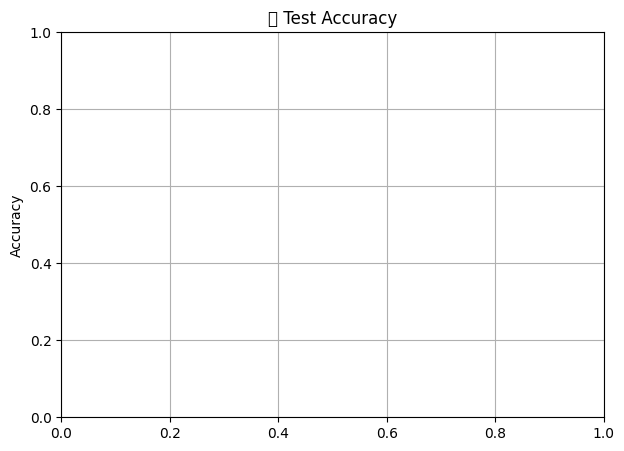

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


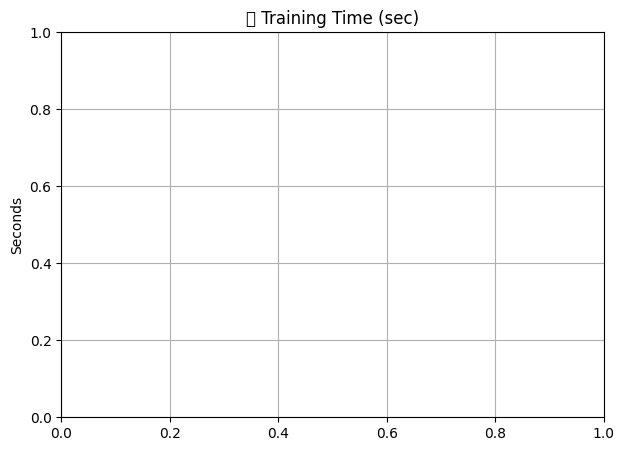

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


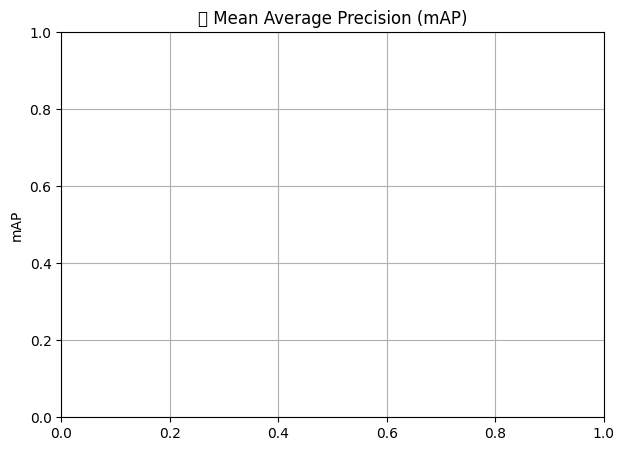

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fallback-safe retrieval
def safe_get(var_name, default=None):
    try:
        return globals()[var_name]
    except:
        return default

# Define models and metrics
models = []
accuracies = []
times = []
maps = []

# Add ResNet50
if safe_get("acc_resnet") is not None:
    models.append("ResNet50")
    accuracies.append(acc_resnet)
    times.append(time_resnet)
    maps.append(precision_score(resnet_preds[0], resnet_preds[1], average='macro'))

# Add DenseNet121
if safe_get("acc_densenet") is not None:
    models.append("DenseNet121")
    accuracies.append(acc_densenet)
    times.append(time_densenet)
    maps.append(precision_score(densenet_preds[0], densenet_preds[1], average='macro'))

# Add MobileNetV3
if safe_get("acc_mobilenet") is not None:
    models.append("MobileNetV3")
    accuracies.append(acc_mobilenet)
    times.append(time_mobilenet)
    maps.append(precision_score(mobilenet_preds[0], mobilenet_preds[1], average='macro'))

# Plot Accuracy
plt.figure(figsize=(7,5))
sns.barplot(x=models, y=accuracies)
plt.title(" Test Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.show()

# Plot Training Time
plt.figure(figsize=(7,5))
sns.barplot(x=models, y=times)
plt.title("⏱ Training Time (sec)")
plt.ylabel("Seconds")
plt.grid(True)
plt.show()

# Plot mAP Score
plt.figure(figsize=(7,5))
sns.barplot(x=models, y=maps)
plt.title(" Mean Average Precision (mAP)")
plt.ylabel("mAP")
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.show()
